# Bike Sharing in London


### The main objective of analyzing this dataset is to explore the impact of hours in a day, seasonality, humidity, temperature, and wind speed on the number of new bike shares.


#### The dataset "London bike sharing dataset" was found on and downloaded from Kaggle: https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset

#### Column name explanation:

"timestamp" - timestamp field for grouping the data

"cnt" - the count of a new bike shares

"t1" - real temperature in C

"t2" - temperature in C "feels like"

"hum" - humidity in percentage

"wind_speed" - wind speed in km/h

"weather_code" - category of the weather

"is_holiday" - boolean field - 1 holiday / 0 non holiday

"is_weekend" - boolean field - 1 if the day is weekend

"season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weather_code" category description:
    
    1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
    2 = scattered clouds / few clouds 
    3 = Broken clouds 
    4 = Cloudy 
    7 = Rain/ light Rain shower/ Light rain 
    10 = rain with thunderstorm 
    26 = snowfall 
    94 = Freezing Fog

## Data cleaning

In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# read csv file
df = pd.read_csv("london_merged.csv")

In [14]:
# explore the first 20 rows of the dataset
df.head(20)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [15]:
df.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [16]:
# explore data types in each column
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [17]:
# columns weather_code, is_holiday, is_weekend, season: float -> integer
df[["weather_code","is_holiday","is_weekend","season"]] = df[["weather_code","is_holiday","is_weekend","season"]].astype(int)

In [18]:
# check data types
df.head(30) #.dtypes

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1,0,1,3
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4,0,1,3
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4,0,1,3
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4,0,1,3
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3,0,1,3


In [19]:
# column timestamp: string -> datetime

df['timestamp'] = df['timestamp'].astype('datetime64[ns]')

In [21]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code             int64
is_holiday               int64
is_weekend               int64
season                   int64
dtype: object

In [22]:
# split column timestamp into "date" and "time"

df['date'] = pd.to_datetime(df['timestamp']).dt.date
df['time'] = pd.to_datetime(df['timestamp']).dt.time

df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015-01-04,00:00:00
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015-01-04,01:00:00
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015-01-04,02:00:00
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015-01-04,03:00:00
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015-01-04,04:00:00


In [27]:
# add new column "month"

df["month"] = df["timestamp"].dt.month

In [34]:
# add new column "year"

df["year"] = df["timestamp"].dt.year

In [35]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code             int64
is_holiday               int64
is_weekend               int64
season                   int64
date                    object
time                    object
month                    int64
year                     int64
dtype: object

In [30]:
df.tail(20)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time,month
17394,2017-01-03 04:00:00,30,0.0,-4.0,93.0,14.0,1,0,0,3,2017-01-03,04:00:00,1
17395,2017-01-03 05:00:00,83,0.5,-3.5,90.0,14.0,3,0,0,3,2017-01-03,05:00:00,1
17396,2017-01-03 06:00:00,434,1.0,-3.5,87.0,18.0,1,0,0,3,2017-01-03,06:00:00,1
17397,2017-01-03 07:00:00,1407,1.0,-4.0,87.0,19.0,1,0,0,3,2017-01-03,07:00:00,1
17398,2017-01-03 08:00:00,2904,1.0,-3.5,87.0,18.5,3,0,0,3,2017-01-03,08:00:00,1
17399,2017-01-03 09:00:00,1357,2.5,-1.5,81.0,14.0,1,0,0,3,2017-01-03,09:00:00,1
17400,2017-01-03 10:00:00,661,3.0,-2.0,81.0,20.0,1,0,0,3,2017-01-03,10:00:00,1
17401,2017-01-03 11:00:00,636,4.0,0.0,78.0,21.0,1,0,0,3,2017-01-03,11:00:00,1
17402,2017-01-03 12:00:00,825,5.0,1.0,76.0,21.0,3,0,0,3,2017-01-03,12:00:00,1
17403,2017-01-03 13:00:00,878,6.0,2.0,71.0,23.0,4,0,0,3,2017-01-03,13:00:00,1


In [23]:
df["date"].max()

datetime.date(2017, 1, 3)

In [24]:
df["date"].min()

datetime.date(2015, 1, 4)

In [25]:
# null values
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
date            0
time            0
dtype: int64

## Analyses

#### 1. Summer 2015
#### 2. Summer 2016
#### 3. Winter 2015-2017
#### 4. Holidays
#### 5. Weekdays
#### 6. Weekends

### Summer 2015

In [94]:
# Peak hours in summer (season = 1) 2015

df_summer15 = df[(df['season'] == 1) & (df['year'] == 2015)]


max_cnt_summer15 = df_summer15['cnt'].max()
max_cnt_summer15   # 7860


df_summer15[df_summer15['cnt']==max_cnt_summer15]['time']
# Peak hours in summer 2015 -> 17:00

4470    17:00:00
Name: time, dtype: object

In [95]:
max_cnt_summer15

7860

In [99]:
df_summer15_top30 = df_summer15[['date','time','cnt','t1','t2','weather_code','wind_speed','is_holiday','is_weekend']].sort_values(by = 'cnt', ascending = False).head(30)
df_summer15_top30

# Peak biking hours -> 07:00-09:00 / 16:00-18:00

,date,time,cnt,t1,t2,weather_code,wind_speed,is_holiday,is_weekend
4470,2015-07-09,17:00:00,7860,23.0,22.0,1,11.0,0,0
4461,2015-07-09,08:00:00,7531,14.5,14.5,2,19.0,0,0
5138,2015-08-06,17:00:00,7208,22.5,22.5,2,17.5,0,0
4471,2015-07-09,18:00:00,6913,22.5,21.5,1,13.0,0,0
5129,2015-08-06,08:00:00,6585,19.0,19.0,7,12.0,0,0
5139,2015-08-06,18:00:00,6394,21.5,21.5,2,20.0,0,0
4469,2015-07-09,16:00:00,6033,23.0,22.0,1,11.0,0,0
4446,2015-07-08,17:00:00,5560,20.0,20.0,2,30.0,0,0
4460,2015-07-09,07:00:00,5309,13.5,13.5,1,17.0,0,0
5137,2015-08-06,16:00:00,5112,23.0,23.0,2,19.5,0,0


In [102]:
df_summer15_top30['weather_code'].value_counts()

# waether code 7: Rain/ light Rain shower/ Light rain
# There's one rainy weekday in summer 2015 on which people heavily rode bikes

1    14
2    10
3     5
7     1
Name: weather_code, dtype: int64

In [108]:
df_summer15_top30['cnt'].mean()   # 5313.633333333333

# avg number of rides in top 30 hours summer 2016: 4963.7
# Summer 2015 has 350 more bike rides than in 2016 during peak hours

5313.633333333333

In [105]:
df_summer15['weather_code'].value_counts()

1     1004
2      500
3      367
7      224
4      103
10       3
Name: weather_code, dtype: int64

### Summer 2016

In [43]:
max_cnt_summer = df_summer16['cnt'].max()
max_cnt_summer

5304

In [44]:
# Peak hours in summer (season = 1) 2016

df_summer16 = df[(df['season'] == 1) & (df['year'] == 2016)]

max_cnt_summer = df_summer16['cnt'].max()
max_cnt_summer   # 5304
# Compared with last summer, there are 2k+ fewer max new rides in 2016

df_summer16[df_summer16['cnt']==max_cnt_summer]['time']

# There are 5304 new rides at around 17:00 in summer 2016.
# Evening when the sun 

13421    17:00:00
Name: time, dtype: object

In [143]:
df_summer16_top30 = df_summer16[['date','time','cnt','t1','t2','hum','weather_code','wind_speed','is_holiday','is_weekend']].sort_values(by = 'cnt', ascending = False).head(30)
df_summer16_top30

# Peak hours in summer 2016: 08:00, 17:00, 18:00 on weekdays
# We can infer that most users are commuters: they go to work/school and return home by bike

,date,time,cnt,t1,t2,hum,weather_code,wind_speed,is_holiday,is_weekend
13421,2016-07-19,17:00:00,5304,31.0,30.5,39.5,1,18.0,0,0
13422,2016-07-19,18:00:00,5282,28.5,29.5,51.0,1,21.0,0,0
14065,2016-08-15,17:00:00,5186,21.0,21.0,53.0,1,24.0,0,0
13398,2016-07-18,18:00:00,5112,28.0,28.0,42.0,1,14.0,0,0
13397,2016-07-18,17:00:00,5082,29.0,28.0,31.0,1,9.0,0,0
13100,2016-07-06,08:00:00,5064,15.5,15.5,61.0,1,13.0,0,0
13445,2016-07-20,17:00:00,5046,30.0,29.5,39.0,1,26.0,0,0
14111,2016-08-17,18:00:00,5038,22.5,22.5,48.5,1,18.0,0,0
14110,2016-08-17,17:00:00,5016,23.5,23.5,45.5,1,18.0,0,0
14254,2016-08-23,17:00:00,5008,29.0,29.0,41.5,1,16.0,0,0


In [144]:
df_summer16.sort_values(by = 'cnt', ascending = False).head(20)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time,month,year
13421,2016-07-19 17:00:00,5304,31.0,30.5,39.5,18.0,1,0,0,1,2016-07-19,17:00:00,7,2016
13422,2016-07-19 18:00:00,5282,28.5,29.5,51.0,21.0,1,0,0,1,2016-07-19,18:00:00,7,2016
14065,2016-08-15 17:00:00,5186,21.0,21.0,53.0,24.0,1,0,0,1,2016-08-15,17:00:00,8,2016
13398,2016-07-18 18:00:00,5112,28.0,28.0,42.0,14.0,1,0,0,1,2016-07-18,18:00:00,7,2016
13397,2016-07-18 17:00:00,5082,29.0,28.0,31.0,9.0,1,0,0,1,2016-07-18,17:00:00,7,2016
13100,2016-07-06 08:00:00,5064,15.5,15.5,61.0,13.0,1,0,0,1,2016-07-06,08:00:00,7,2016
13445,2016-07-20 17:00:00,5046,30.0,29.5,39.0,26.0,1,0,0,1,2016-07-20,17:00:00,7,2016
14111,2016-08-17 18:00:00,5038,22.5,22.5,48.5,18.0,1,0,0,1,2016-08-17,18:00:00,8,2016
14110,2016-08-17 17:00:00,5016,23.5,23.5,45.5,18.0,1,0,0,1,2016-08-17,17:00:00,8,2016
14254,2016-08-23 17:00:00,5008,29.0,29.0,41.5,16.0,1,0,0,1,2016-08-23,17:00:00,8,2016


In [110]:
df_summer16_top30['time'].value_counts()

08:00:00    12
17:00:00    10
18:00:00     8
Name: time, dtype: int64

In [103]:
df_summer16_top30['weather_code'].value_counts()

# In summer 2016, people were more willing to ride a bike on clear/sunny days

1    24
2     6
Name: weather_code, dtype: int64

In [104]:
df_summer16['weather_code'].value_counts()

# The overall weather in summer 2015 seemed to come with more clear/sunny days than in 2016

1     818
2     619
3     408
7     226
4     113
10      2
Name: weather_code, dtype: int64

In [96]:
df_summer16_top30['cnt'].mean()   # 4963.7

4963.7

In [71]:
avg_summer16_temp = df_summer16['t1'].mean()  # 18.64981701738335

# get number of rows -> df.shape[0]
df_summer16_top30[df_summer16_top30['t1'] >= avg_summer16_temp].shape[0]   # 20 days temp above avg

# Riders enjoy riding bikes more on warmer days in summer

20

### Winter 2015-2017

In [52]:
# Peak hours in the winter (season = 3)

df_winter = df[(df['season'] == 3)]

max_cnt_winter = df_winter['cnt'].max()
max_cnt_winter

df_winter[df_winter['cnt']==max_cnt_winter]['time']

16750    08:00:00
Name: time, dtype: object

In [142]:
df_winter_top30 = df_winter[['date','time','cnt','t1','t2','hum','weather_code','wind_speed','is_holiday','is_weekend']].sort_values(by = 'cnt', ascending = False).head(30)
df_winter_top30

# Riders in the winter ride the shared bike mostly at around 8AM

,date,time,cnt,t1,t2,hum,weather_code,wind_speed,is_holiday,is_weekend
16750,2016-12-07,08:00:00,4415,12.0,12.0,88.0,2,14.0,0,0
16726,2016-12-06,08:00:00,4386,4.0,3.0,100.0,2,6.5,0,0
7959,2015-12-03,08:00:00,4369,13.0,13.0,77.0,2,15.0,0,0
7935,2015-12-02,08:00:00,4323,13.0,13.0,72.0,3,21.5,0,0
16894,2016-12-13,08:00:00,4258,10.5,10.5,91.0,3,6.0,0,0
16774,2016-12-08,08:00:00,4236,12.0,12.0,82.0,1,18.5,0,0
8103,2015-12-09,08:00:00,4208,7.0,5.0,76.0,1,9.0,0,0
16942,2016-12-15,08:00:00,4198,8.5,6.5,93.5,4,12.0,0,0
7911,2015-12-01,08:00:00,4185,14.0,14.0,79.5,3,27.0,0,0
16918,2016-12-14,08:00:00,4162,9.0,8.0,94.0,1,7.0,0,0


In [69]:
avg_winter_temp = df_winter['t1'].mean() # 7.686951501154734

# get number of rows -> df.shape[0]
df_winter_top30[df_winter_top30['t1'] >= avg_winter_temp].shape[0]   # 16

# Among the 30 hours with the highest number of riders in winter, 
# the temperatures are above average about half of the time (16 days) 
# We can conclude that temperature does not significantly affect people's willingness to ride a bike in winter

16

In [133]:
df_winter['wind_speed'].mean()   # 17.127251732101616

df_winter_top30[df_winter_top30['wind_speed'] <= df_winter['wind_speed'].mean()].shape[0]    # 20

# 66.67% of the time with the highest number of rides, people ride a bike on less windy days in winter.
# Wind speed is considered a factor affecting people's decision of whether or not to ride a bike.

20

In [135]:
# time

df_winter_top30['time'].value_counts()

08:00:00    29
14:00:00     1
Name: time, dtype: int64

In [136]:
# weather

df_winter_top30['weather_code'].value_counts()

# Top 30
#1: 43.33%
#2: 33.33%
#3: 16.67%
#4: 6.67%

# All winter
#1: 28.18%
#2: 22.19%
#3: 21.39%
#4: 12.7%

# top 30 vs all winter hours
# weather is 

2    13
1    10
3     5
4     2
Name: weather_code, dtype: int64

In [137]:
df_winter['weather_code'].value_counts()

#1: 28.18%
#2: 22.19%
#3: 21.39%
#4: 12.7%

1     1220
3      961
2      926
7      628
4      550
26      44
10       1
Name: weather_code, dtype: int64

In [138]:
df_winter['weather_code'].shape

(4330,)

In [ ]:
# Note

# On Christmas 2016 the underground was out of service, boosting the use of shared bikes.

In [141]:
df_winter.sort_values(by = 'cnt', ascending = False).tail(30)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time,month,year
7906,2015-12-01 03:00:00,22,10.0,10.0,94.0,6.0,7,0,0,3,2015-12-01,03:00:00,12,2015
1201,2015-02-23 03:00:00,22,7.0,4.0,78.5,18.5,1,0,0,3,2015-02-23,03:00:00,2,2015
27,2015-01-05 03:00:00,22,6.0,4.5,84.0,7.5,4,0,0,3,2015-01-05,03:00:00,1,2015
9744,2016-02-16 04:00:00,22,1.0,0.0,87.0,5.0,1,0,0,3,2016-02-16,04:00:00,2,2016
8934,2016-01-13 03:00:00,22,6.0,2.0,73.5,24.0,3,0,0,3,2016-01-13,03:00:00,1,2016
9078,2016-01-19 03:00:00,21,-1.0,-1.0,86.0,2.0,1,0,0,3,2016-01-19,03:00:00,1,2016
866,2015-02-09 03:00:00,21,4.0,1.0,87.0,11.0,3,0,0,3,2015-02-09,03:00:00,2,2015
890,2015-02-10 03:00:00,21,4.0,4.0,93.0,4.0,4,0,0,3,2015-02-10,03:00:00,2,2015
217,2015-01-13 02:00:00,21,11.5,11.5,88.0,24.5,7,0,0,3,2015-01-13,02:00:00,1,2015
723,2015-02-03 04:00:00,21,1.0,-1.0,93.0,6.5,7,0,0,3,2015-02-03,04:00:00,2,2015


### Holidays

In [73]:
# Holidays

df_holi = df[df['is_holiday'] == 1]
df_holi.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time,month,year
2129,2015-04-03 00:00:00,279,8.0,6.0,82.0,10.0,7,1,0,0,2015-04-03,00:00:00,4,2015
2130,2015-04-03 01:00:00,174,8.0,5.5,79.0,14.0,7,1,0,0,2015-04-03,01:00:00,4,2015
2131,2015-04-03 02:00:00,89,7.5,5.5,84.5,12.0,7,1,0,0,2015-04-03,02:00:00,4,2015
2132,2015-04-03 03:00:00,61,7.0,5.0,87.0,11.0,7,1,0,0,2015-04-03,03:00:00,4,2015
2133,2015-04-03 04:00:00,46,7.0,6.0,93.0,6.0,7,1,0,0,2015-04-03,04:00:00,4,2015


In [127]:
df_holi_top30 = df_holi.sort_values(by = 'cnt', ascending = False).head(30)
df_holi_top30

# max cnt on holidays: 3100
# Compared with weekdays and weekends, there are fewer new rides on holidays

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time,month,year
14395,2016-08-29 14:00:00,3100,22.0,22.0,53.0,8.0,2,1,0,1,2016-08-29,14:00:00,8,2016
14398,2016-08-29 17:00:00,3094,23.0,23.0,44.0,15.0,1,1,0,1,2016-08-29,17:00:00,8,2016
14397,2016-08-29 16:00:00,3090,23.0,23.0,45.5,5.5,2,1,0,1,2016-08-29,16:00:00,8,2016
14396,2016-08-29 15:00:00,3075,22.5,22.5,50.0,6.0,2,1,0,1,2016-08-29,15:00:00,8,2016
2886,2015-05-04 14:00:00,3057,18.0,18.0,47.5,19.5,2,1,0,0,2015-05-04,14:00:00,5,2015
2215,2015-04-06 15:00:00,3000,13.5,13.5,69.5,18.0,3,1,0,0,2015-04-06,15:00:00,4,2015
2214,2015-04-06 14:00:00,2993,14.0,14.0,67.0,16.0,2,1,0,0,2015-04-06,14:00:00,4,2015
2887,2015-05-04 15:00:00,2981,17.0,17.0,52.0,14.0,2,1,0,0,2015-05-04,15:00:00,5,2015
2885,2015-05-04 13:00:00,2980,18.0,18.0,44.5,18.0,2,1,0,0,2015-05-04,13:00:00,5,2015
2888,2015-05-04 16:00:00,2933,17.0,17.0,56.0,14.0,2,1,0,0,2015-05-04,16:00:00,5,2015


In [86]:
df_holi['date'].unique()

array([datetime.date(2015, 4, 3), datetime.date(2015, 4, 6),
       datetime.date(2015, 5, 4), datetime.date(2015, 5, 25),
       datetime.date(2015, 8, 31), datetime.date(2015, 12, 25),
       datetime.date(2015, 12, 28), datetime.date(2016, 1, 1),
       datetime.date(2016, 3, 25), datetime.date(2016, 3, 28),
       datetime.date(2016, 5, 2), datetime.date(2016, 5, 30),
       datetime.date(2016, 8, 29), datetime.date(2016, 12, 26),
       datetime.date(2016, 12, 27), datetime.date(2017, 1, 2)],
      dtype=object)

In [129]:
df_holi_top30['time'].value_counts()

# On holidays, riders were mostly active from noon to afternoon

13:00:00    6
14:00:00    5
16:00:00    5
15:00:00    5
17:00:00    4
12:00:00    4
18:00:00    1
Name: time, dtype: int64

In [87]:
df_holi['cnt'].mean()

769.5260416666666

### Weekdays

In [89]:
df_wkday = df[(df['is_holiday'] == 0) & (df['is_weekend'] == 0)]
df_wkday.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time,month,year
24,2015-01-05 00:00:00,83,4.0,3.0,93.0,6.0,4,0,0,3,2015-01-05,00:00:00,1,2015
25,2015-01-05 01:00:00,67,4.0,3.5,93.0,5.0,4,0,0,3,2015-01-05,01:00:00,1,2015
26,2015-01-05 02:00:00,32,5.0,4.0,87.0,6.0,4,0,0,3,2015-01-05,02:00:00,1,2015
27,2015-01-05 03:00:00,22,6.0,4.5,84.0,7.5,4,0,0,3,2015-01-05,03:00:00,1,2015
28,2015-01-05 04:00:00,38,6.5,5.0,84.0,8.0,4,0,0,3,2015-01-05,04:00:00,1,2015


In [93]:
df_wkday.sort_values(by = 'cnt', ascending = False).head(30)

# max rides per hr on weekdays: 7860

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time,month,year
4470,2015-07-09 17:00:00,7860,23.0,22.0,27.0,11.0,1,0,0,1,2015-07-09,17:00:00,7,2015
4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2,0,0,1,2015-07-09,08:00:00,7,2015
5138,2015-08-06 17:00:00,7208,22.5,22.5,55.0,17.5,2,0,0,1,2015-08-06,17:00:00,8,2015
4471,2015-07-09 18:00:00,6913,22.5,21.5,29.0,13.0,1,0,0,1,2015-07-09,18:00:00,7,2015
5129,2015-08-06 08:00:00,6585,19.0,19.0,78.0,12.0,7,0,0,1,2015-08-06,08:00:00,8,2015
5139,2015-08-06 18:00:00,6394,21.5,21.5,58.5,20.0,2,0,0,1,2015-08-06,18:00:00,8,2015
4469,2015-07-09 16:00:00,6033,23.0,22.0,26.0,11.0,1,0,0,1,2015-07-09,16:00:00,7,2015
4446,2015-07-08 17:00:00,5560,20.0,20.0,53.0,30.0,2,0,0,1,2015-07-08,17:00:00,7,2015
14736,2016-09-14 08:00:00,5422,22.5,22.5,71.0,14.0,1,0,0,2,2016-09-14,08:00:00,9,2016
14746,2016-09-14 18:00:00,5345,26.0,26.0,48.0,11.0,1,0,0,2,2016-09-14,18:00:00,9,2016


In [123]:
# dates with highest number of rides

df_day_ttl_cnt = df.groupby('date')['cnt'].sum()
#sorted(df_day_ttl_cnt)
df_day_ttl_cnt.sort_values(ascending=False).head(10)

# Interestingly, there was an underground strike on July 9, 2015, forcing people to take an alternative transport
# There was a second tube strike on August 6, 2015
# That is why on these two days the number of rides became exceptionally high
# On July 19, 2016 there was a heatwave, it might help explain why people chose biking over taking the underground

date
2015-07-09    72504
2015-08-06    63468
2016-07-19    46021
2016-07-30    45608
2016-05-08    44758
2016-07-31    44678
2016-07-20    44664
2016-09-14    44478
2015-08-22    44187
2016-08-14    43848
Name: cnt, dtype: int64

### Weekends

In [74]:
# Weekends

df_wknd = df[df['is_weekend'] == 1]
df_wknd.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time,month,year
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3,0,1,3,2015-01-04,00:00:00,1,2015
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1,0,1,3,2015-01-04,01:00:00,1,2015
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1,0,1,3,2015-01-04,02:00:00,1,2015
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1,0,1,3,2015-01-04,03:00:00,1,2015
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1,0,1,3,2015-01-04,04:00:00,1,2015


In [76]:
df_wknd.sort_values(by = 'cnt', ascending = False).head(30)

# max new rides on weekends: 4341

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,date,time,month,year
11704,2016-05-08 13:00:00,4341,26.0,26.0,37.0,24.0,1,0,1,0,2016-05-08,13:00:00,5,2016
13680,2016-07-30 14:00:00,4214,21.5,21.5,50.0,12.0,3,0,1,1,2016-07-30,14:00:00,7,2016
11706,2016-05-08 15:00:00,4181,26.0,26.0,37.0,19.5,1,0,1,0,2016-05-08,15:00:00,5,2016
5015,2015-08-01 14:00:00,4175,22.5,21.5,37.0,18.0,1,0,1,1,2015-08-01,14:00:00,8,2015
13681,2016-07-30 15:00:00,4172,22.0,21.5,47.0,11.0,3,0,1,1,2016-07-30,15:00:00,7,2016
14040,2016-08-14 16:00:00,4101,22.5,21.5,42.5,7.5,1,0,1,1,2016-08-14,16:00:00,8,2016
13702,2016-07-31 13:00:00,4100,20.5,20.5,47.5,17.0,2,0,1,1,2016-07-31,13:00:00,7,2016
14039,2016-08-14 15:00:00,4097,21.5,21.0,45.0,9.0,1,0,1,1,2016-08-14,15:00:00,8,2016
14042,2016-08-14 18:00:00,4097,22.0,21.0,44.0,10.0,1,0,1,1,2016-08-14,18:00:00,8,2016
11705,2016-05-08 14:00:00,4063,26.0,26.0,37.0,21.0,1,0,1,0,2016-05-08,14:00:00,5,2016


In [125]:
# Comparison

df_wkday['cnt'].mean()   # 1223.2767827529021

df_holi['cnt'].mean()   # 769.5260416666666

df_wknd['cnt'].mean()   # 977.41569416499

# In terms of avg rides per hour, weekdays > weekends > holidays

977.41569416499

## Visualization

<AxesSubplot:xlabel='wind_speed', ylabel='cnt'>

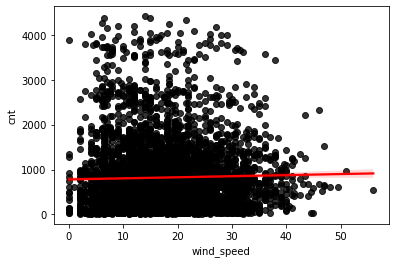

In [145]:
sns.regplot(x="wind_speed", y="cnt", data=df_winter, scatter_kws = {'color':'black'}, line_kws = {'color':'red'})

# Wind speed has very little to do with the number of rides in winter.

<AxesSubplot:xlabel='t1', ylabel='cnt'>

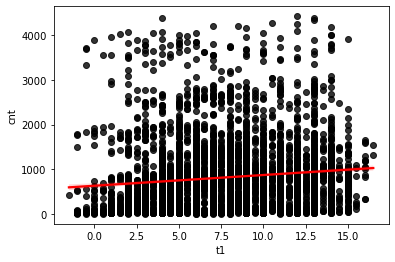

In [146]:
sns.regplot(x="t1", y="cnt", data=df_winter, scatter_kws = {'color':'black'}, line_kws = {'color':'red'})

# There is no significant correlation between number of rides and temperature in winter.

<AxesSubplot:xlabel='hum', ylabel='cnt'>

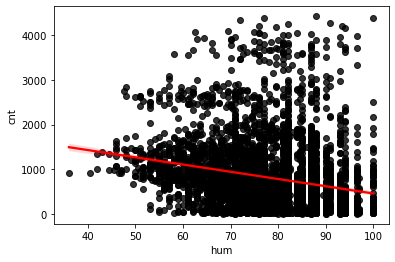

In [152]:
sns.regplot(x="hum", y="cnt", data=df_winter, scatter_kws = {'color':'black'}, line_kws = {'color':'red'})

# The higher the humidity in winter, the less frequently people ride a bike in London.

<AxesSubplot:xlabel='wind_speed', ylabel='cnt'>

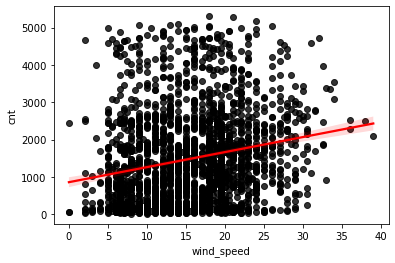

In [148]:
sns.regplot(x="wind_speed", y="cnt", data=df_summer16, scatter_kws = {'color':'black'}, line_kws = {'color':'red'})

# While wind speed does not affect the number of rides in winter
# there are more rides in summer when there's wind

<AxesSubplot:xlabel='t1', ylabel='cnt'>

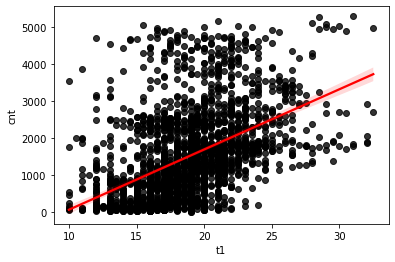

In [149]:
sns.regplot(x="t1", y="cnt", data=df_summer16, scatter_kws = {'color':'black'}, line_kws = {'color':'red'})

# The higher the temperature in summer, the more actively people ride bikes.

<AxesSubplot:xlabel='hum', ylabel='cnt'>

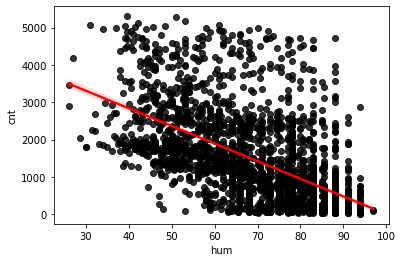

In [151]:
sns.regplot(x="hum", y="cnt", data=df_summer16, scatter_kws = {'color':'black'}, line_kws = {'color':'red'})

# The higher the humidity in summer, the fewer the rides
# High humidity -> usually rainy

In [ ]:
# create a new data frame where Peak Position = 1
df_pp1 = df[df["Peak Position"] == 1]

# histogram
df_pp1['Peak Position (xTimes)'].plot(kind='hist')

# set axis labels
plt.xlabel("Peak Position Times")
plt.ylabel("Number of Songs")

# show plot
plt.show()

In [155]:
df_win_weather_cnt = df_winter.groupby('weather_code')['cnt'].sum()
#sorted(df_day_ttl_cnt)
df_win_weather_cnt.sort_values(ascending=False)

weather_code
2     978375
3     934083
1     927399
4     363008
7     340984
26     14010
10       228
Name: cnt, dtype: int64

In [157]:
df_winter['weather_code'].value_counts()

1     1220
3      961
2      926
7      628
4      550
26      44
10       1
Name: weather_code, dtype: int64

In [159]:
# avg ride per hour in winter by weather

927399/1220   #1: 760.1631147540984
978375/926   #2: 1056.5604751619871
934083/961   #3: 971.990634755463
363008/550   #4: 660.0145454545454
340984/628   #7: 542.968152866242
228/1        #10: 228
14010/44     #26: 318.40909090909093

760.1631147540984

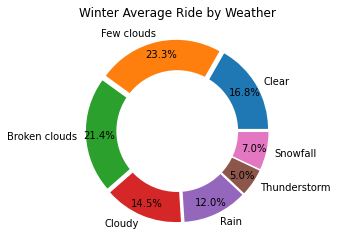

In [170]:
# pie chart

avg_ride_win_weather = [760.16, 1056.56, 971.99, 660.01, 542.97, 228, 318.41]

weather = ['Clear', 'Few clouds', 'Broken clouds', 'Cloudy', 'Rain','Thunderstorm', 'Snowfall']

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
 
# Pie Chart
plt.pie(avg_ride_win_weather, labels=weather,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Winter Average Ride by Weather')
 
# Displaying Chart
plt.show()

In [188]:
df_month_cnt15 = df[df.year == 2015].pivot_table(index = ["month"], values = ["cnt"], aggfunc =sum, fill_value=0)
df_month_cnt15

,cnt
month,
1,546639
2,543594
3,695934
4,831582
5,895413
6,1033252
7,1120687
8,1033951
9,892478


In [185]:
df_month_cnt16 = df[df.year == 2016].pivot_table(index = ["month"], values = ["cnt"], aggfunc =sum, fill_value=0)
df_month_cnt16

,cnt
month,
1,582518
2,592910
3,656527
4,768845
5,1001935
6,933878
7,1165527
8,1137314
9,998619


In [191]:
# combine two pivot tables
df_month_cnt_1516 = df_month_cnt15.merge(df_month_cnt16, on='month',how='left')

# rename columns
df_month_cnt_1516.columns = ['cnt15', 'cnt16']
df_month_cnt_1516

,cnt15,cnt16
month,,
1,546639,582518
2,543594,592910
3,695934,656527
4,831582,768845
5,895413,1001935
6,1033252,933878
7,1120687,1165527
8,1033951,1137314
9,892478,998619


In [192]:
plot_data = df_month_cnt_1516.loc[:,["cnt15", "cnt16"]]

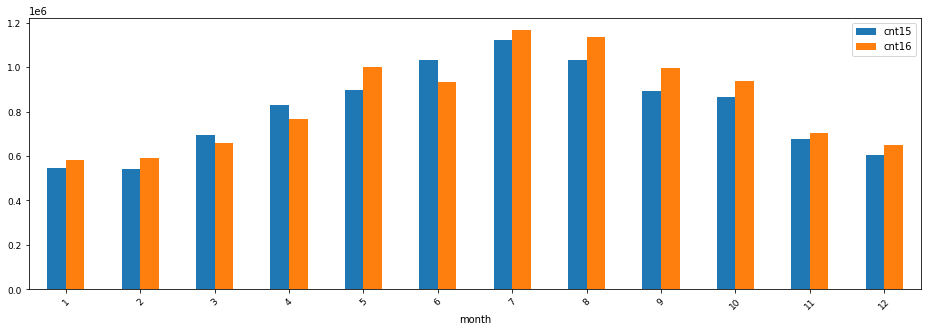

In [232]:
# Monthly rides comparison 2015 vs 2016

ax = plot_data.plot(
    kind='bar', rot=45, fontsize=9,
    figsize=(16, 5))

# Highest number of rides from May to September
# Each month, there are usually more rides in 2016 than in 2015
# 2016 has better overall performance

In [198]:
df_cnt_per_hr_spr = df[df.season == 0].pivot_table(index = ["time"], values = ["cnt"], aggfunc = sum, fill_value=0)
df_cnt_per_hr_spr

,cnt
time,
00:00:00,45556
01:00:00,29591
02:00:00,20120
03:00:00,14415
04:00:00,11437
05:00:00,17828
06:00:00,81810
07:00:00,262578
08:00:00,502109


In [199]:
df_cnt_per_hr_sum = df[df.season == 1].pivot_table(index = ["time"], values = ["cnt"], aggfunc = sum, fill_value=0)
df_cnt_per_hr_sum

,cnt
time,
00:00:00,75296
01:00:00,50952
02:00:00,34262
03:00:00,23471
04:00:00,18046
05:00:00,26063
06:00:00,103053
07:00:00,309409
08:00:00,578174


In [200]:
df_cnt_per_hr_aut = df[df.season == 2].pivot_table(index = ["time"], values = ["cnt"], aggfunc = sum, fill_value=0)
df_cnt_per_hr_aut

,cnt
time,
00:00:00,52032
01:00:00,37944
02:00:00,25941
03:00:00,17532
04:00:00,13544
05:00:00,21048
06:00:00,89717
07:00:00,287278
08:00:00,571831


In [201]:
df_cnt_per_hr_win = df[df.season == 3].pivot_table(index = ["time"], values = ["cnt"], aggfunc = sum, fill_value=0)
df_cnt_per_hr_win

,cnt
time,
00:00:00,37517
01:00:00,26770
02:00:00,17952
03:00:00,12533
04:00:00,9832
05:00:00,14881
06:00:00,64191
07:00:00,207044
08:00:00,435050


In [212]:
df_cnt_per_hr_season = pd.merge(df_cnt_per_hr_spr, df_cnt_per_hr_sum, on='time', how='left')
df_cnt_per_hr_season = pd.merge(df_cnt_per_hr_season, df_cnt_per_hr_aut, on='time', how='left')
df_cnt_per_hr_season = pd.merge(df_cnt_per_hr_season, df_cnt_per_hr_win, on='time', how='left')
df_cnt_per_hr_season

# rename columns
df_cnt_per_hr_season.columns = ['spring', 'summer', 'autumn', 'winter']
df_cnt_per_hr_season

/var/folders/y_/_jftc6hs4kz3g6nj1rrbj6lr0000gn/T/ipykernel_61167/1835494671.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'cnt_x'} in the result is deprecated and will raise a MergeError in a future version.
  df_cnt_per_hr_season = pd.merge(df_cnt_per_hr_season, df_cnt_per_hr_win, on='time', how='left')


,spring,summer,autumn,winter
time,,,,
00:00:00,45556,75296,52032,37517
01:00:00,29591,50952,37944,26770
02:00:00,20120,34262,25941,17952
03:00:00,14415,23471,17532,12533
04:00:00,11437,18046,13544,9832
05:00:00,17828,26063,21048,14881
06:00:00,81810,103053,89717,64191
07:00:00,262578,309409,287278,207044
08:00:00,502109,578174,571831,435050


In [214]:
plot_data1 = df_cnt_per_hr_season.loc[:,['spring', 'summer', 'autumn', 'winter']]

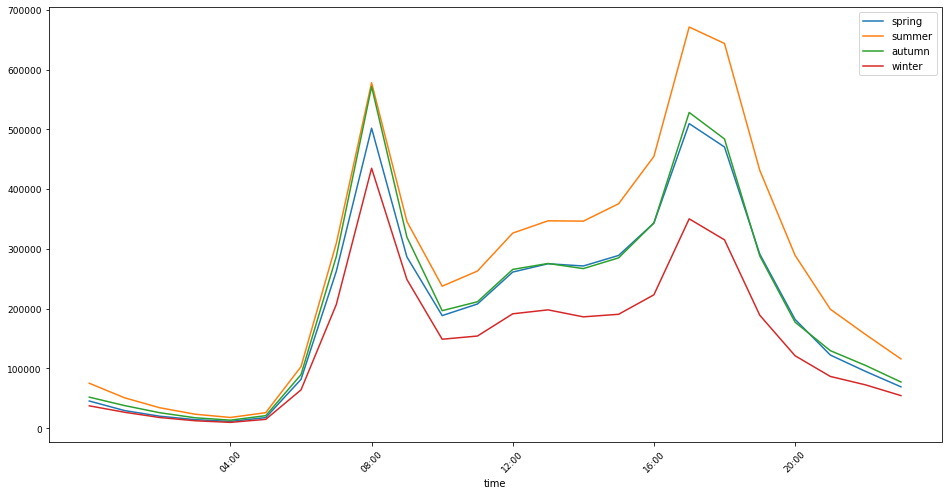

In [237]:
# avg hourly rides across 4 seasons

ax = plot_data1.plot(
    kind='line', rot=45, fontsize=9,
    figsize=(16, 8))

#ax.set_xticks(x_ticks)
ax.set_xticks(['04:00:00','08:00:00','12:00:00','16:00:00','20:00:00']) 

plt.show()

# the distribution of avg hourly rides turns out similar across the 4 seasons

## Observations

#### 1. Shared bikes are used more often on weekdays than on weekends or holidays. 
Therefore, we can conclude that in London, shared bikes are more for commuting than for leisurely purpose.
The company should consider commuters to be possible leads/long-term customers.

#### 2. Biking is an alternative for underground. 
Interestingly, the number of rides soars when underground is out of service.

#### 3. Temperature, humidity, time, and wind speed are important factors that affect the number of bike rides in summer

#### 4. While in winter, Londoners decide whether or not to ride shared bikes according to time and humidity. 

#### 5. The distribution of avg hourly rides turns out similar across the 4 seasons
Same peak hours: 8AM, 5PM, 6PM

Interesting result: In terms of peak hour rides, in summer there are more rides in the evening, while in winter in the morning

In spring and autumn the number of rides are similar in the morning and in the evening
